# Проверка статистических гипотез для количественных признаков

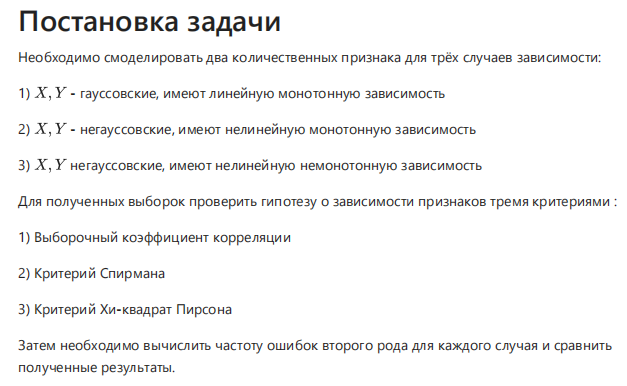

## Реализация

### Генерация выборок

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [104]:
def gen_gaussian_lin_mono(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu, sigma, n)
    y = 0.6 * x + 0.7 * z
    return x, y

def gen_notgaussian_notlin_mono(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu**2, sigma, n)
    y = 0.15*np.exp(0.5*x) + 0.2 * z**2
    return x, y

def gen_notgaussian_notlin_notmono(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu/2, sigma, n)
    y = 10*np.sin(x**2) - np.abs(z)
    return x, y

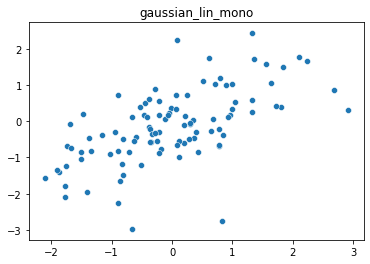

In [105]:
x1, y1 = gen_gaussian_lin_mono(0, 1, 100)
sns.scatterplot(x=x1, y=y1)
plt.title('gaussian_lin_mono')
plt.show()

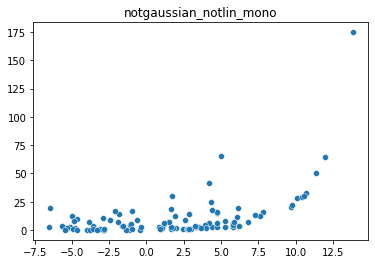

In [106]:
x2, y2 = gen_notgaussian_notlin_mono(1, 5, 100)
sns.scatterplot(x=x2, y=y2)
plt.title('notgaussian_notlin_mono')
plt.show()

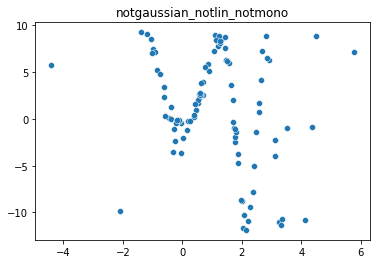

In [107]:
x3, y3 = gen_notgaussian_notlin_notmono(1.0, 1.5, 100)
sns.scatterplot(x=x3, y=y3)
plt.title('notgaussian_notlin_notmono')
plt.show()

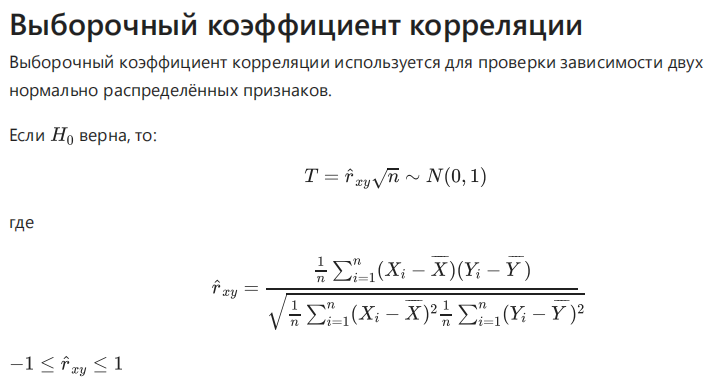

In [108]:
def Sample_corr_test(x, y, alpha = 0.05):
    complete = 0
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    r = (1 / n * np.sum((x - x_mean) * (y - y_mean))) / \
    (1 / n * np.sum((x - x_mean) ** 2) * 1 / n * np.sum((y - y_mean) ** 2)) ** 0.5
    
    t_value = n ** 0.5 * r
    p_value = np.min(np.array([2 * stats.norm.cdf(t_value), 2 - 2 * stats.norm.cdf(t_value)]), axis=0)
    
    if (p_value > alpha / 2) and (p_value < (1 - alpha / 2)):
        complete = 0
    else:
        complete = 1
    
    return r, t_value, p_value, complete

In [109]:
Sample_corr_test(x1, y1)

(0.6113572211583761, 6.113572211583761, 9.742524564870791e-10, 1)

In [110]:
stats.pearsonr(x1, y1)

(0.6113572211583761, 1.420047797338836e-11)

In [111]:
Sample_corr_test(x2, y2)

(0.50160495737046, 5.016049573704599, 5.274472472116543e-07, 1)

In [112]:
stats.pearsonr(x2, y2)

(0.5016049573704601, 1.0595167310682081e-07)

In [113]:
Sample_corr_test(x3, y3)

(-0.23902707172296836, -2.3902707172296838, 0.016835957741957695, 1)

In [114]:
stats.pearsonr(x3, y3)

(-0.23902707172296833, 0.016618270572841178)

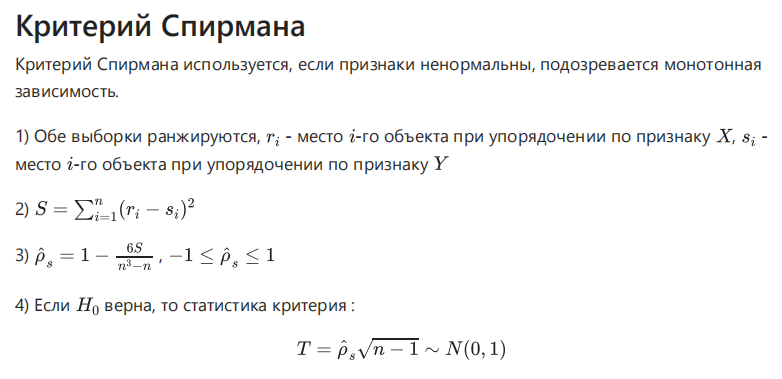

In [115]:
def ranging(x):
    x_sorted = np.sort(x)
    R = np.array([])
    elems = np.array([])
    x_rangs = np.array([])
    i = 1

    while i <= len(x):
        x_count = (x_sorted == x_sorted[i-1]).sum()
        if x_count == 1:
            R = np.append(R, i)
            elems = np.append(elems, x_sorted[x_sorted == x_sorted[i-1]])
        else:
            for j in range(x_count):
                R = np.append(R, i + (c - 1) / 2)
                elems = np.append(elems, x_sorted[x_sorted == x_sorted[i-1]][0])
        i += x_count
    for k in range(len(x)):
        idx = np.where(elems == x[k])
        x_rangs = np.append(x_rangs, R[idx[0]])
    return x_rangs
        
def Spearman_test(x, y, alpha = 0.05):
    complete = 0
    n = len(x)
    x_rangs = ranging(x)
    y_rangs = ranging(y)
    r_spearman = 1 - 6 / (n ** 3 - n) * np.sum((x_rangs - y_rangs) ** 2)
    
    t_value = (n-1) ** 0.5 * r_spearman
    p_value = np.min(np.array([2 * stats.norm.cdf(t_value), 2 - 2 * stats.norm.cdf(t_value)]), axis=0)
    
    if (p_value > alpha / 2) and (p_value < (1 - alpha / 2)):
        complete = 0
    else:
        complete = 1
    
    return r_spearman, t_value, p_value, complete

In [116]:
Spearman_test(x1, y1)

(0.6341194119411941, 6.309408485069257, 2.801039400424088e-10, 1)

In [117]:
stats.spearmanr(x1, y1)

SpearmanrResult(correlation=0.634119411941194, pvalue=1.416917936941044e-12)

In [118]:
Spearman_test(x2, y2)

(0.4983498349834984, 4.95851825092738, 7.103286656651164e-07, 1)

In [119]:
stats.spearmanr(x2, y2)

SpearmanrResult(correlation=0.4983498349834983, pvalue=1.3185320423569108e-07)

In [120]:
Spearman_test(x3, y3)

(-0.2406360636063607, -2.394298602031184, 0.01665218579912562, 1)

In [121]:
stats.spearmanr(x3, y3)

SpearmanrResult(correlation=-0.2406360636063606, pvalue=0.015880191891369997)

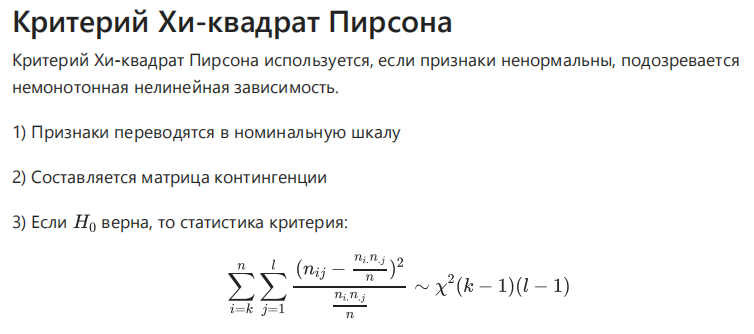

In [122]:
def to_nominal(x, k):
    x_sort = np.sort(x)
    x_in_scale = np.zeros(k)
    slices = np.linspace(x_sort[0], x_sort[-1], k+1)
    for i in range(k):
        x_part = x[x >= slices[i]]
        x_count = (x_part <= slices[i+1]).sum()
        x_in_scale[i] = x_count
    return x_in_scale

def Pirson_test(x, y, coeffs = True, alpha = 0.05):
    complete = 0
    n = len(x)
    x_nom = to_nominal(x, 5)
    y_nom = to_nominal(y, 5)
    matrix = np.concatenate(([x_nom], [y_nom]))
    chi2_value = 0
    for i in range(2):
        for j in range(len(x_nom)):
            chi2_value += (matrix[i][j] - (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))) ** 2 \
            / (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))

    if coeffs == True:
        pirson_coeff = (chi2_value / (np.sum(matrix) + chi2_value)) ** 0.5
        kramer_coeff = (chi2_value / (np.sum(matrix) * np.min([(len(x_nom) - 1), 1]))) ** 0.5
        chuprov_coeff = (chi2_value / (np.sum(matrix) * ((len(x_nom) - 1)) ** 0.5)) ** 0.5
        print(f'Pirson coeff = {pirson_coeff}\n')
        print(f'Kramer coeff = {kramer_coeff}\n')
        print(f'Chuprov coeff = {chuprov_coeff}\n')
    p_value = 1 - stats.chi2.cdf(chi2_value, (len(x_nom) - 1))
    
    if p_value > alpha:
        complete = 0
    else:
        complete = 1

    return chi2_value, p_value, complete

In [123]:
Pirson_test(x1, y1)

Pirson coeff = 0.27776180925734845

Kramer coeff = 0.28913945355420384

Chuprov coeff = 0.20445246831675035



(16.720324720324722, 0.0021903373111628044, 1)

In [124]:
from scipy.stats import chi2_contingency
x_nom = to_nominal(x1, 5)
y_nom = to_nominal(y1, 5)
chi2_contingency([x_nom, y_nom])

(16.720324720324722,
 0.0021903373111627736,
 4,
 array([[10.5, 26. , 39. , 18.5,  6. ],
        [10.5, 26. , 39. , 18.5,  6. ]]))

In [125]:
Pirson_test(x2, y2)

Pirson coeff = 0.5937408172433425

Kramer coeff = 0.7378812297767472

Chuprov coeff = 0.5217608212854069



(108.89374185136896, 0.0, 1)

In [126]:
from scipy.stats import chi2_contingency
x_nom = to_nominal(x2, 5)
y_nom = to_nominal(y2, 5)
chi2_contingency([x_nom, y_nom])

(108.89374185136896,
 1.2528568227573564e-22,
 4,
 array([[59., 13., 17.,  7.,  4.],
        [59., 13., 17.,  7.,  4.]]))

In [127]:
Pirson_test(x3, y3)

Pirson coeff = 0.42217725612978546

Kramer coeff = 0.4657154570023277

Chuprov coeff = 0.3293105577497379



(43.378177378177384, 8.637051629456494e-09, 1)

In [128]:
from scipy.stats import chi2_contingency
x_nom = to_nominal(x3, 5)
y_nom = to_nominal(y3, 5)
chi2_contingency([x_nom, y_nom])

(43.378177378177384,
 8.637051666657668e-09,
 4,
 array([[ 7. , 10.5, 38.5, 26. , 18. ],
        [ 7. , 10.5, 38.5, 26. , 18. ]]))

# Тест
## Подсчет ошибок 2-го рода

In [129]:
def beta_error_frequency(mu, sigma, n, num_experiments, f):
    Corr_test_result = []
    Spearman_test_result = []
    Pirson_test_result = []
    for i in range(num_experiments):
        x, y = f(mu, sigma, n)
        Corr_test_result.append(Sample_corr_test(x, y)[3])
        Spearman_test_result.append(Spearman_test(x, y)[3])
        Pirson_test_result.append(Pirson_test(x, y, coeffs = False)[2])
    Corr_test_frequency = (len(Corr_test_result) - sum(Corr_test_result)) / len(Corr_test_result)
    Spearman_test_frequency = (len(Spearman_test_result) - sum(Spearman_test_result)) / len(Spearman_test_result)
    Pirson_test_frequency = (len(Pirson_test_result) - sum(Pirson_test_result)) / len(Pirson_test_result)
    return Corr_test_frequency, Spearman_test_frequency, Pirson_test_frequency

# X и Y гауссовские

In [138]:
num_experiments = 1000
n = 100
mu = 5
sigma = 10

In [139]:
c, s, p = beta_error_frequency(mu, sigma, n, num_experiments, f = gen_gaussian_lin_mono)

In [140]:
c,s,p

(0.029, 0.051, 0.58)

# X и Y не гауссовские, монотонная зависимость

In [141]:
c, s, p = beta_error_frequency(mu, sigma, n, num_experiments, f = gen_notgaussian_notlin_mono)

In [142]:
c,s,p

(0.025, 0.066, 0.296)

# X и Y не гауссовские, немонотонная зависимость

In [143]:
c, s, p = beta_error_frequency(mu, sigma, n, num_experiments, f = gen_notgaussian_notlin_notmono)

In [144]:
c,s,p

(0.949, 0.946, 0.596)